In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
data = pd.read_csv('data.csv', index_col=False)

# Convert deadline and launched columns to date time format.
data['deadline'] = pd.to_datetime(data['deadline'], infer_datetime_format=True)
data['launched'] = pd.to_datetime(data['launched'], infer_datetime_format=True)

In [3]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
data.shape

(378661, 15)

In [6]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
data.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [8]:
data['state'].head(25)

0         failed
1         failed
2         failed
3         failed
4       canceled
5     successful
6     successful
7         failed
8       canceled
9       canceled
10        failed
11    successful
12        failed
13        failed
14    successful
15        failed
16        failed
17        failed
18    successful
19        failed
20    successful
21        failed
22        failed
23        failed
24    successful
Name: state, dtype: object

In [9]:
# Removing rows with state other than 'failed' or 'successful'
data_required = data[data['state'].isin(['failed', 'successful'])]

In [10]:
data_required.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


In [11]:
# Calculate duration of campaign and add new columns for year, month name and weekday name
data_required = data_required.assign(duration=pd.Series((data_required['deadline'] - data_required['launched']).dt.days)) # Did it this way to avoid SettingWithCopyWarning
data_required['year'] = data_required['launched'].dt.year
data_required['month'] = data_required['launched'].dt.month_name()
data_required['weekday'] = data_required['launched'].dt.weekday_name

In [12]:
data_required.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,year,month,weekday
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59,2017,September,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29,2012,March,Saturday
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,34,2016,February,Friday


In [13]:
# Drop unncessary data for analysis
data_required = data_required.drop(['ID', 'name', 'currency', 'goal',
                                    'pledged', 'usd pledged', 'deadline', 'launched'], axis=1)

In [14]:
data_required.isnull().sum()

category            0
main_category       0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
duration            0
year                0
month               0
weekday             0
dtype: int64

In [15]:
data_required.reset_index(drop=True, inplace=True)

In [16]:
data_required.shape

(331675, 11)

In [17]:
data_required.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration,year,month,weekday
0,Poetry,Publishing,failed,0,GB,0.0,1533.95,58,2015,August,Tuesday
1,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00,59,2017,September,Saturday
2,Narrative Film,Film & Video,failed,3,US,220.0,45000.00,44,2013,January,Saturday
3,Music,Music,failed,1,US,1.0,5000.00,29,2012,March,Saturday
4,Restaurants,Food,successful,224,US,52375.0,50000.00,34,2016,February,Friday


# Exploratory Data Analysis

Text(0.5,1,u'Fig 1: Count of Projects with States')

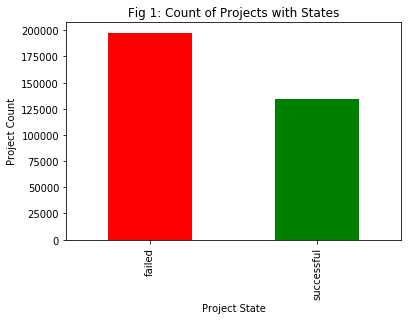

In [18]:
ax = data_required.groupby('state').size().plot(kind='bar', color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Project State')
ax.set_title('Fig 1: Count of Projects with States')

The number of failed projects are 50% more the number of successful projects. Point to be noted while modelling.

Text(0.5,1,u'Fig 2: Project states with Mean Duration of Campaign')

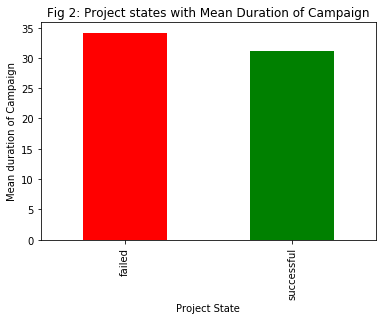

In [19]:
ax = data_required.groupby('state').duration.mean().plot(kind='bar', color=['r', 'g'])
ax.set_ylabel('Mean duration of Campaign')
ax.set_xlabel('Project State')
ax.set_title('Fig 2: Project states with Mean Duration of Campaign')

Before drawing conclusions from the above plot, it is important to note that the number of samples for failed is 50% more compared to successful projects. The duration of the campaign may not be related to the project success/failure.

Text(0.5,1,u'Fig 3: Project states with different Countries')

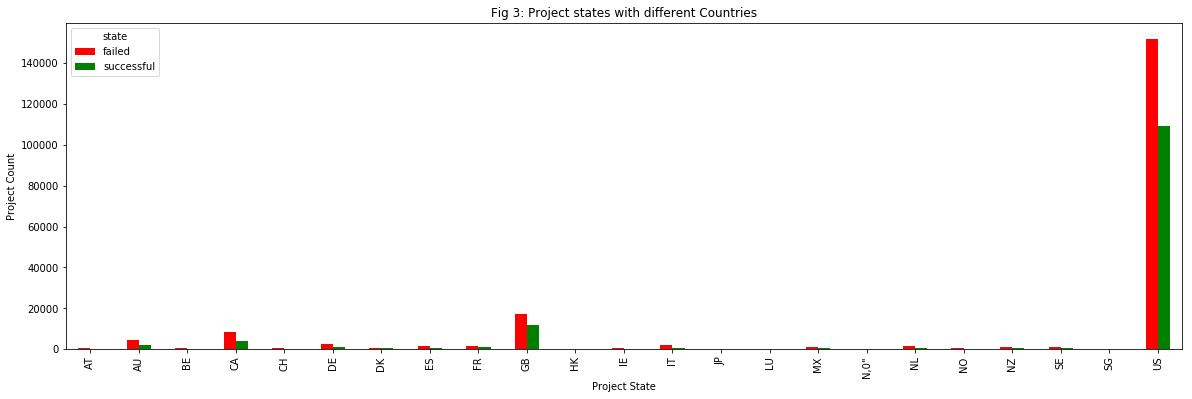

In [20]:
ax = data_required.groupby(['country', 'state']).size().unstack(1).plot(kind='bar', figsize=(20,6), color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Project State')
ax.set_title('Fig 3: Project states with different Countries')

The number of projects in USA are 7 times more than the next highest Great Britain. It also explains why there are more number of projects that are successful as well failed. It will be interesting to see how it effects the model.

Text(0.5,1,u'Fig 4: Project Count with Years')

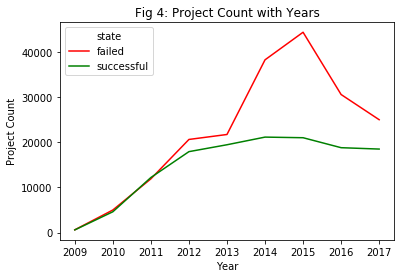

In [21]:
ax = data_required.groupby(['year', 'state']).size().unstack(1).plot(kind='line', color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Year')
ax.set_title('Fig 4: Project Count with Years')

The above plot looks quite interesting because of the number of failures fluctuated a lot while the number of successful projects remains relatively same in the last few years. The number of failures around 2015 are more than double the successful projects. 

Text(0.5,1,u'Fig 5: Project Count in different Months')

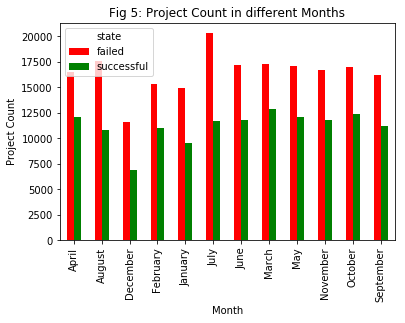

In [22]:
ax = data_required.groupby(['month', 'state']).size().unstack(1).plot(kind='bar', color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Month')
ax.set_title('Fig 5: Project Count in different Months')

Surprisingly the least number of projects were started during December. The relativel levels or number of projects during other months except the end and beginning of the year shows the interesting pattern in Money used after the holiday season. 

Text(0.5,1,u'Fig 6: Project Count during Weekdays')

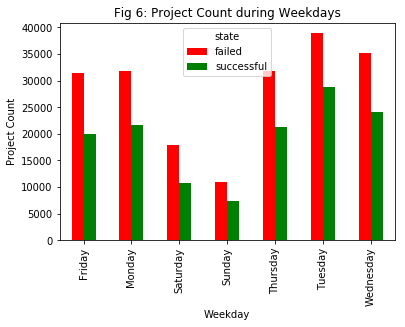

In [23]:
ax = data_required.groupby(['weekday', 'state']).size().unstack(1).plot(kind='bar', color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Weekday')
ax.set_title('Fig 6: Project Count during Weekdays')

Launching the project mid week gave higher success rate than launching them on weekends. This makes sense as Launching mid week catches the most people attention.

Text(0.5,1,u'Fig 7: Project Count in Main Categories every Weekday')

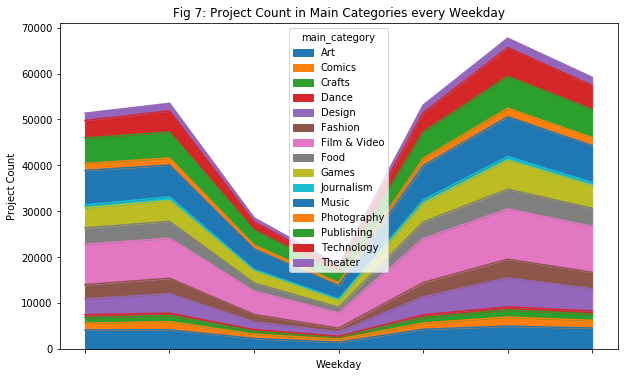

In [24]:
ax = data_required.groupby(['weekday', 'main_category']).size().unstack(1).plot(kind='area',
                                                                                figsize=(10, 6))
ax.set_ylabel('Project Count')
ax.set_xlabel('Weekday')
ax.set_title('Fig 7: Project Count in Main Categories every Weekday')

It is quite interesting to know that most projects are backed during Thursdays and the least are backed during Sundays. The individual categories maintain their position during the whole week which is interesting!

### Pie chart to show the various main categories and their counts with respect to one another

Text(0.5,1,u'Fig 8: Project count in main categories')

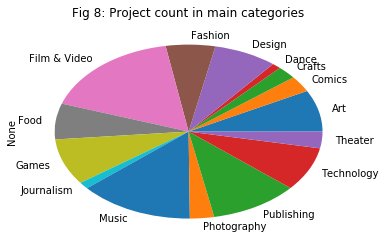

In [25]:
ax = data_required.groupby('main_category').size().plot(kind='pie')
ax.set_title('Fig 8: Project count in main categories')

Text(0.5,1,u'Fig 9: Project Count in Main Categories')

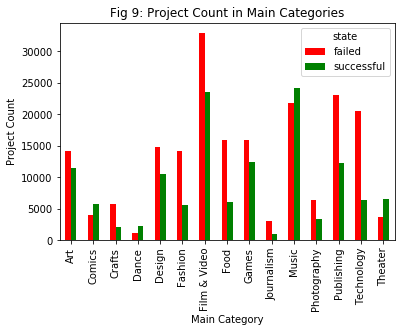

In [26]:
ax = data_required.groupby(['main_category', 'state']).size().unstack(1).plot(kind='bar', color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Main Category')
ax.set_title('Fig 9: Project Count in Main Categories')

Music, Dance and Theater have more successful projects than failed ones despite being opposite in others. Might be good areas to look for. 

Text(0.5,1,u'Fig 10: Project Count in Main Categories every Year')

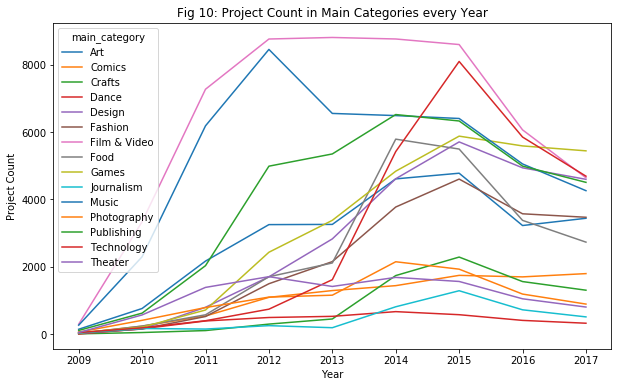

In [27]:
ax = data_required.groupby(['year', 'main_category']).size().unstack(1).plot(kind='line', figsize=(10, 6))
ax.set_ylabel('Project Count')
ax.set_xlabel('Year')
ax.set_title('Fig 10: Project Count in Main Categories every Year')

The number of projects in all main categories except photography are decreasing in past few years. The categories Film and Video, Music, Dance, Food have seen a sharp decline in the last few years. 

Text(0.5,1,u'Fig 11: USD amount pledged in main categories')

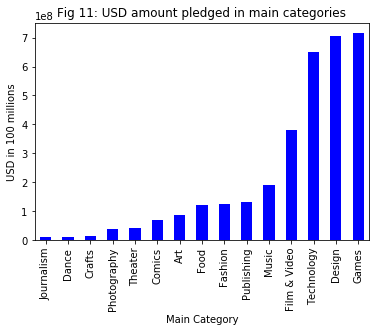

In [28]:
ax = data_required.groupby('main_category').usd_pledged_real.sum().sort_values().plot(kind='bar', color=['b'])
ax.set_ylabel('USD in 100 millions')
ax.set_xlabel('Main Category')
ax.set_title('Fig 11: USD amount pledged in main categories')

Text(0.5,1,u'Fig 12: Number of Backers in Main Categories')

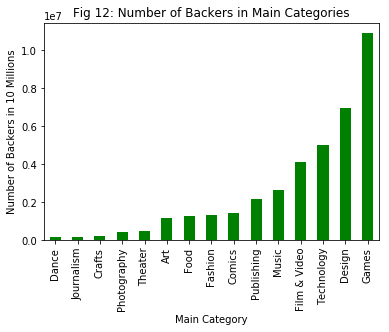

In [29]:
ax = data_required.groupby('main_category').backers.sum().sort_values().plot(kind='bar', color=['g'])
ax.set_ylabel('Number of Backers in 10 Millions')
ax.set_xlabel('Main Category')
ax.set_title('Fig 12: Number of Backers in Main Categories')

Although it is obvious from the above two plots that the USD amount pledged is directly proportional to number of backers, it is interesting to note that the amount per backer in Design and Technology category is considerably higher than Games category. 

Text(0.5,1,u'Fig 13: Mean Campaign duration in Main Categories')

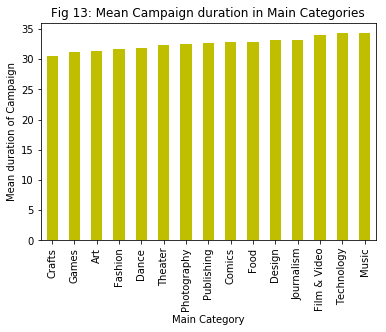

In [30]:
ax = data_required.groupby('main_category').duration.mean().sort_values().plot(kind='bar', color=['y'])
ax.set_ylabel('Mean duration of Campaign')
ax.set_xlabel('Main Category')
ax.set_title('Fig 13: Mean Campaign duration in Main Categories')

From figure 9 and 13, it can be observed that the Music looks like an exception with having highest mean duration per campaign and having the higest success rate.

Text(0.5,1,u'Fig 14: Project Count in Main Categories')

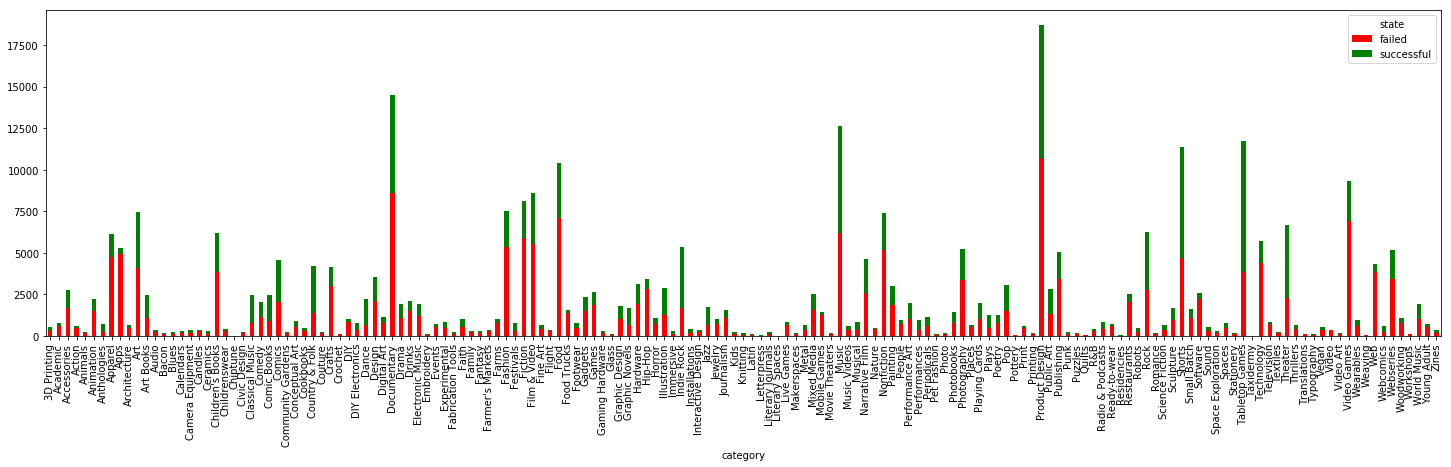

In [31]:
data_required.groupby(['category', 'state']).size().unstack().plot(kind='bar', figsize=(25, 6), stacked=True, color=['r', 'g'])
ax.set_ylabel('Project Count')
ax.set_xlabel('Category')
ax.set_title('Fig 14: Project Count in Main Categories')

Product design looks like having the most number of samples category wise with obviously more success and failed projects.

In [32]:
def state_comparision(df, variable_name, plot_range, chart_title, y_label, x_label):
    """Compar the given variable with project  state and plot the visualization
    """
    temp = df.groupby([variable_name, 'state']).size().reset_index(name='state_count')
    state_count = temp.groupby([variable_name, 'state']).agg({'state_count': 'sum'})
    variable_count = temp.groupby([variable_name]).agg({'state_count': 'sum'})
    state_proportions = (state_count.div(variable_count, level=variable_name)*100).reset_index()
    success_proportion = state_proportions[state_proportions['state'].isin(['successful'])]
    success_rate = success_proportion['state_count'].values
    variables = success_proportion[variable_name].values
    plt.plot(variables[:plot_range], success_rate[:plot_range])
    plt.ylim(0, 105)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    return success_proportion

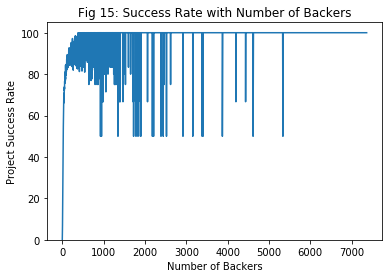

In [33]:
backer_sucess = state_comparision(data_required, 'backers', 3500, 
                                  'Fig 15: Success Rate with Number of Backers',
                                  'Project Success Rate', 'Number of Backers')

It is obvious that the success rate increases with the number of backers. From the data, it is clear that having 150 or more backers gives a really high chance of project success

In [34]:
backer_sucess.head()

,backers,state,state_count
1,0,successful,0.270291
3,1,successful,1.170299
5,2,successful,1.671695
7,3,successful,3.133290
9,4,successful,4.503904


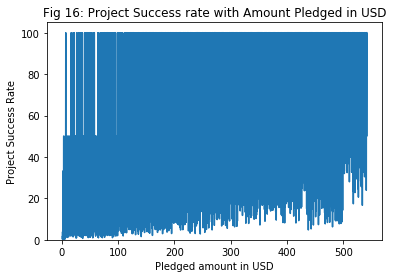

In [35]:
usd_pledge_real = state_comparision(data_required, 'usd_pledged_real', 3000,
                                 'Fig 16: Project Success rate with Amount Pledged in USD',
                                 'Project Success Rate',
                                 'Pledged amount in USD')

The above plot shows that the amount pledged is directly proportional to project success. Because of the fluctuation it is not very clear.

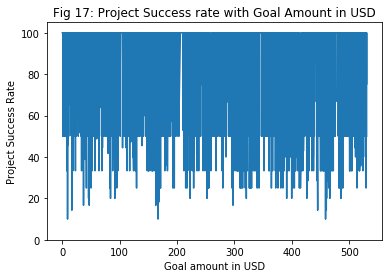

In [36]:
usd_goal_real = state_comparision(data_required, 'usd_goal_real', 3000,
                                 'Fig 17: Project Success rate with Goal Amount in USD',
                                 'Project Success Rate',
                                 'Goal amount in USD')

There might be any relation between Project success and Goal amount.

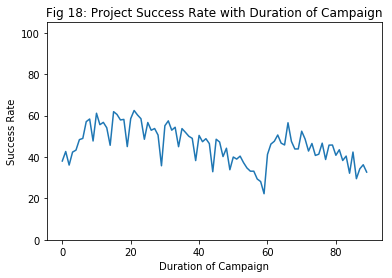

In [37]:
duration_success = state_comparision(data_required, 'duration', 90,
                                     'Fig 18: Project Success Rate with Duration of Campaign',
                                    'Success Rate', 'Duration of Campaign')

The top 3 include 21, 15 and 10 days. The relation between duration of campaign and success is not really clear.

In [38]:
data_required.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration,year,month,weekday
0,Poetry,Publishing,failed,0,GB,0.0,1533.95,58,2015,August,Tuesday
1,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00,59,2017,September,Saturday
2,Narrative Film,Film & Video,failed,3,US,220.0,45000.00,44,2013,January,Saturday
3,Music,Music,failed,1,US,1.0,5000.00,29,2012,March,Saturday
4,Restaurants,Food,successful,224,US,52375.0,50000.00,34,2016,February,Friday


# Predictive Modelling

In [39]:
# Extract labels
labels = data_required['state'].tolist()
labels = np.asarray([1 if l == 'successful' else 0 for l in labels])

In [40]:
# Create input data with one hot vector encoded columns for categorical data
input_data = data_required.drop(['state'], axis=1)
input_data = pd.get_dummies(input_data)
input_data.head()

,backers,usd_pledged_real,usd_goal_real,duration,year,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0.0,1533.95,58,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,15,2421.0,30000.00,59,2017,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,220.0,45000.00,44,2013,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1.0,5000.00,29,2012,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,224,52375.0,50000.00,34,2016,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
input_data_array = input_data.values

In [42]:
# Scale the columns to 0 and 1
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(input_data_array)

I wanted use Grid Search with Kfold cross validation for model selection and hyper parameter tuning. Since it was taking way too long to process, I manually tried different models starting from SGD classifier with Hinge loss, SVM classifier, Random Forest to Multi layer perceptron Classifier with 5 fold cross validation. I got the best model as Random Forest Classifier and then I performed hyper parameter tuning on random forest manually by varying the number of estimators, criterion, max_depth and max_features again with 5 fold cross validation. The best hyper paramters were just number of estimaters as 100, criterion as gini index, max_depth to be the depth till reaching the leaves of the decision tree and max_features to be the square root of number of features. 

In [43]:
# Perform k fold cross validaton and get the best model with the test data
kf = KFold(n_splits=5, random_state=42)
best_f1 = 0
best_model = None
x_te, y_te = None, None
for train_idx, test_idx in kf.split(x):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    f1 = metrics.f1_score(y_test, pred)
    if f1 > best_f1:
        best_f1 = f1
        best_model = classifier
        x_te = x_test
        y_te = y_test
best_f1

0.9762912943722136

Another way of doing this would be to use sklearn.learning_curve to validate the best model.

In [44]:
# Calculate metrics to evaluate the model
prob = best_model.predict_proba(x_te)
pred = best_model.predict(x_te)
precision = metrics.precision_score(y_te, pred)
recall = metrics.recall_score(y_te, pred)
f1_score = metrics.f1_score(y_te, pred)

In [45]:
precision

0.9700485598843459

In [46]:
recall

0.9826148993691799

In [47]:
f1_score

0.9762912943722136

In [48]:
# Calculate the AUC for Precision recall curve
pr, rc, thres = metrics.precision_recall_curve(y_te, prob[:, 1])
auc = metrics.auc(rc, pr) * 100
auc

99.74718385206657

Text(0.5,1,u'Fig 18: Precision Recall Curve')

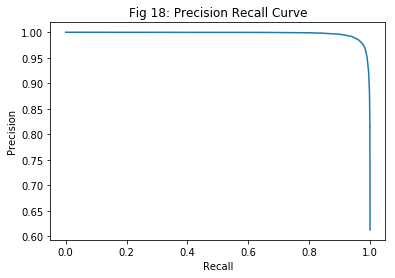

In [49]:
plt.plot(rc, pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Fig 18: Precision Recall Curve')

In [50]:
# Get the most important features
column_names = np.array(input_data.columns)
feature_imp = best_model.feature_importances_
feature_imp_sorted = sorted(feature_imp, reverse=True)
sorted_column_names = [column_names[np.where(feature_imp == feature_imp_sorted[i])] for i in range(4)]

In [51]:
sorted_column_names

[array(['backers'], dtype=object),
 array(['usd_pledged_real'], dtype=object),
 array(['usd_goal_real'], dtype=object),
 array(['duration'], dtype=object)]

## The most important features for predicting the success/failure of the projects are:
 1. Amount Pledged for the Campaign (Fig 16 shows that success is directly proportional)
 2. Number of Backers in the Campaign (Fig 15 above shows that success is directly proportional)
 3. Total goal amount of the Campaign 
 4. Duration of the Campaign